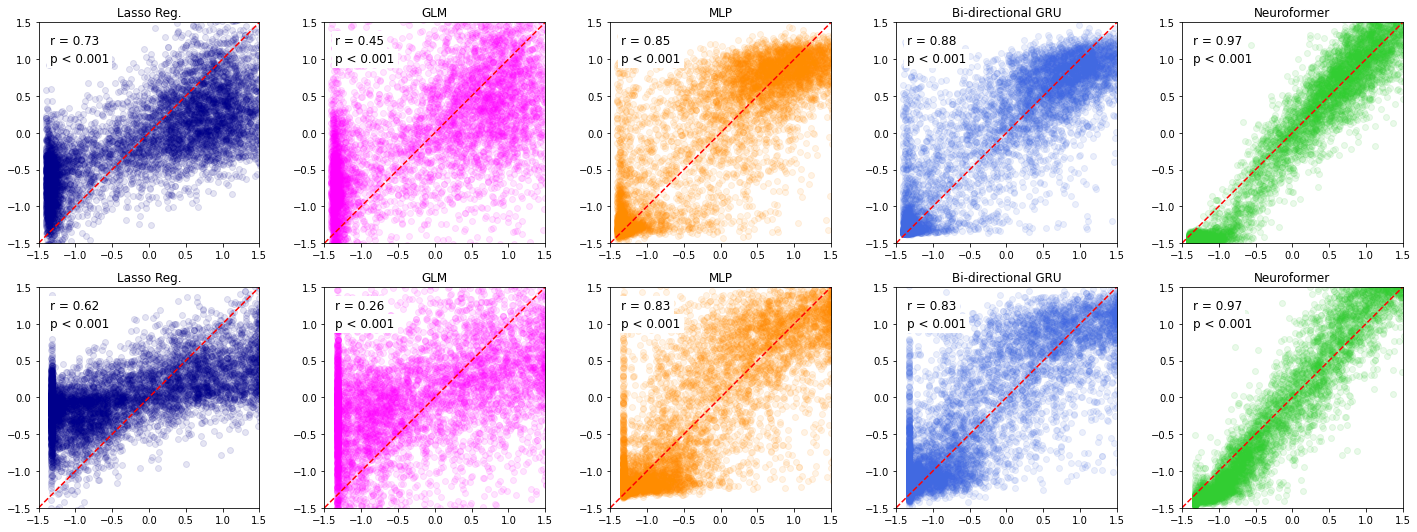

In [3]:
import os
import glob
import pandas as pd
import collections
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

# Load and prepare data
dataset_names = ['medial', 'lateral']
model_names = ['lasso', 'glm', 'MLP', 'GRU_2.0', 'Neuroformer']
# model_names = ['lasso', 'MLP', 'GRU_2.0', 'Neuroformer']
model_name_mapping = {'lasso': 'Lasso Reg.', 'glm': 'GLM', 'MLP': 'MLP', 'GRU_2.0': 'Bi-directional GRU', 'Neuroformer': 'Neuroformer'} 
# model_name_mapping = {'lasso': 'Lasso', 'MLP': 'MLP', 'GRU_2.0': 'Bidirectional GRU', 'Neuroformer': 'Neuroformer'} 
base_dir = "./_rebuttal/behavior/regression"

color_dict = {
    "Neuroformer": 'limegreen',  # Vibrant Green
    "Bi-directional GRU": 'royalblue',  # Royal Blue
    "MLP": 'darkorange',  # Dark Orange
    "GLM": 'magenta',  # Magenta (Fuchsia-like)
    "Lasso Reg.": 'darkblue',  # Dark Blue
    "True": 'black'  # Black
}


df_dict = collections.defaultdict(dict)
for dataset in dataset_names:
    for model in model_names:
        # Construct the path pattern to match
        pattern = os.path.join(base_dir, dataset, model, "*.csv")
        csv_files = glob.glob(pattern)
        if not csv_files:
            continue
        df = pd.read_csv(csv_files[0])
        if df.columns[0] == 'modalities_speed_value':
            df.rename(columns={'modalities_speed_value': 'behavior'}, inplace=True)
        if df.columns[1] == 'interval':
            df.rename(columns={'interval': 'Interval'}, inplace=True)
        df_dict[dataset][model] = df

# Helper function
def tensor_string_to_float(value):
    """Converts a string in the format 'tensor(value)' to float, or returns the float directly if it's already a float."""
    if isinstance(value, str) and 'tensor' in value:
        return float(value.strip('tensor()'))
    elif isinstance(value, float):
        return value
    else:
        raise ValueError(f"Unexpected value: {value}")

# Plotting
n_rows = len(dataset_names)
n_cols = len(model_names)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 7.5))

for row, dataset in enumerate(dataset_names):
    for col, model in enumerate(model_names):
        if model in df_dict[dataset]:
            df = df_dict[dataset][model]
            mapped_model_name = model_name_mapping.get(model, model)
            df['true'] = df['true'].apply(tensor_string_to_float)
            df['behavior'] = df['behavior'].apply(tensor_string_to_float)
            correlation, p_value = scipy.stats.pearsonr(df['true'], df['behavior'])
            ax = axes[row, col]
            ax.scatter(df['true'], df['behavior'], label='Data', c=color_dict[mapped_model_name], alpha=0.1)
            # ax.hexbin(df['true'], df['behavior'], gridsize=20, cmap='Blues')
            ax.plot([-1.5, 1.5], [-1.5, 1.5], color='red', linestyle='--')  # Ideal line
            ax.set_title(f'{mapped_model_name}')
            # ax.set_xlabel('True')
            if row == 0 and col == 0:
                ax.set_ylabel('Visnav, Medial')
            if row == 1 and col == 0:
                ax.set_ylabel('Visnav, Lateral')
            # ax.set_ylabel('Behavior')
            ax.set_xlim(-1.5, 1.5)
            ax.set_ylim(-1.5, 1.5)
            ax.set_xticks(np.arange(-1.5, 1.6, 0.5))
            ax.set_yticks(np.arange(-1.5, 1.6, 0.5))
            ax.set_aspect('equal', 'box')
            ax.text(0.05, 0.85 + 0.05, 'r = {:.2f}'.format(correlation), 
                                transform=ax.transAxes, fontsize=12, 
                                bbox=dict(facecolor='white', edgecolor='none', pad=3))
            if p_value < 0.001:
                p_text = 'p < 0.001'
            else:
                p_text = 'p = {:.3f}'.format(p_value)

            ax.text(0.05, 0.77 + 0.05, p_text, 
                    transform=ax.transAxes, fontsize=12, 
                    bbox=dict(facecolor='white', edgecolor='none', pad=3))

plt.tight_layout()
plt.savefig(os.path.join(base_dir, 'regression.pdf'), bbox_inches='tight')

In [9]:
for dataset in dataset_names:
    for model in model_names:
        # Construct the path pattern to match
        pattern = os.path.join(base_dir, dataset, model, "*.csv")
        csv_files = glob.glob(pattern)
        print(csv_files)

['./_rebuttal/behavior/regression/medial/lasso/lasso_behavior.csv']
['./_rebuttal/behavior/regression/medial/glm/glm_behavior.csv']
['./_rebuttal/behavior/regression/medial/MLP/behavior_preds.csv']
['./_rebuttal/behavior/regression/medial/GRU_2.0/behavior_preds.csv']
['./_rebuttal/behavior/regression/medial/Neuroformer/behavior_preds.csv']
['./_rebuttal/behavior/regression/lateral/lasso/lasso_behavior.csv']
['./_rebuttal/behavior/regression/lateral/glm/glm_behavior.csv']
['./_rebuttal/behavior/regression/lateral/MLP/behavior_preds.csv']
['./_rebuttal/behavior/regression/lateral/GRU_2.0/behavior_preds.csv']
['./_rebuttal/behavior/regression/lateral/Neuroformer/behavior_preds.csv']
